In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utilities import load_data

In [63]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [64]:
# print(f"Is there any null in the training dataset{set(raw_train_data.isnull().drop_duplicates())}")
# print(f"Is there any null in the testing dataset{set(raw_test_data.isnull().drop_duplicates())}")

In [65]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x_pd = raw_test_data.iloc[:, 1:94]
Valid_x = np.array(Valid_x_pd)
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [78]:
print(Total_y)

[['Class_1']
 ['Class_1']
 ['Class_1']
 ...
 ['Class_9']
 ['Class_9']
 ['Class_9']]


In [66]:
Train_data_info = Train_data.describe()
valid_data_info = Valid_x_pd.describe()
# print(Train_data_info)
# print(valid_data_info)

In [90]:
print(f"The size of Train_X: {Total_x.shape}")
print(f"The size of Train_Y: {Total_y.shape}")
print(f"The size of Test_X: {Valid_x.shape}")
print(f"Is there Nan in the training X? {list(set(np.isnan(Total_x).any(axis=1)))}")
print(f"Is there Nan in the testing data set? {list(set(np.isnan(Valid_x).any(axis=1)))}")
print(f"The number of current labels: {len(set([item for i in Total_y.tolist() for item in i ]))}")
print(f"The current labels: {set([item for i in Total_y.tolist() for item in i ])}")


The size of Train_X: (61878, 93)
The size of Train_Y: (61878, 1)
The size of Test_X: (144368, 93)
Is there Nan in the training X? [False]
Is there Nan in the testing data set? [False]
The number of current labels: 9
The current labels: {'Class_9', 'Class_1', 'Class_3', 'Class_7', 'Class_4', 'Class_6', 'Class_8', 'Class_5', 'Class_2'}


In [86]:
Lable_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [87]:
for item in Total_y:
    Lable_counter[item[-1]] += 1

In [70]:
print(Lable_counter)

{'Class_1': 1929, 'Class_2': 16122, 'Class_3': 8004, 'Class_4': 2691, 'Class_5': 2739, 'Class_6': 14135, 'Class_7': 2839, 'Class_8': 8464, 'Class_9': 4955}


Text(0, 0.5, 'Number of Items')

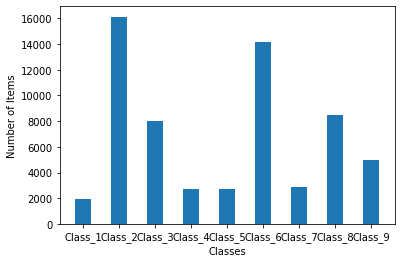

In [71]:
plt.bar(Lable_counter.keys(), Lable_counter.values(),width=0.45)
plt.xlabel("Classes",fontsize=10)
plt.ylabel("Number of Items",fontsize=10)

In [72]:
sum_result = Total_x.sum(axis=0)
feature_dict=dict()
for index in range(len(sum_result)):
    feature_dict.update({index+1:sum_result[index]})

In [73]:
index_list = [f"F{i}" for i in feature_dict.keys()]
feature_number = [i for i in feature_dict.values()]

<BarContainer object of 93 artists>

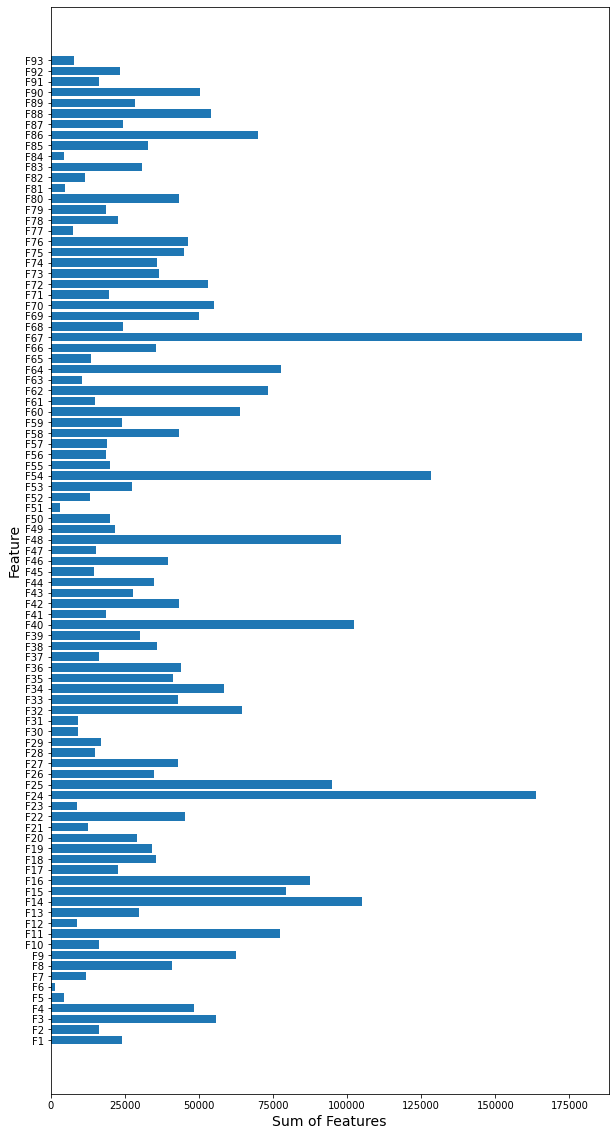

In [74]:
plt.figure(figsize=(10,20))
plt.xlabel("Sum of Features",fontsize=14)
plt.ylabel("Feature",fontsize=14)
plt.barh(index_list,feature_number)
plt.savefig('./feature_number.jpg')